In [24]:
%pip install pandas
%pip install matplotlib
%pip install json
%pip install mlxtend
%pip install seaborn

import pandas as pd
import json
import matplotlib.pyplot as plt
import mlxtend
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [25]:
with open('./tasks_actor_subset.json', 'r') as f:
    data = json.load(f)

tasks = data['data']['tasks']
df = pd.json_normalize(tasks)

# Assuming 'tasks' is the relevant part of the JSON structure containing your query results
tasks = data['data']['tasks']
df = pd.json_normalize(tasks)


In [26]:
# Calculate number of unique requesters
num_unique_requesters = df['requester.id'].nunique()

# Calculate number of unique apps and app owners
num_unique_apps = df['deal.app.id'].nunique()
num_unique_app_owners = df['deal.appOwner.id'].nunique()

# Calculate number of unique datasets and dataset owners
num_unique_datasets = df['deal.dataset.id'].nunique()
num_unique_dataset_owners = df['deal.datasetOwner.id'].nunique()

# Calculate number of unique workerpools and workerpool owners
num_unique_workerpools = df['deal.workerpoolOwner.id'].nunique()
num_unique_workerpool_owners = df['deal.workerpoolOwner.id'].nunique()

print(f"Number of unique requesters: {num_unique_requesters}")
print(f"Number of unique apps: {num_unique_apps}")
print(f"Number of unique app owners: {num_unique_app_owners}")
print(f"Number of unique datasets: {num_unique_datasets}")
print(f"Number of unique dataset owners: {num_unique_dataset_owners}")
print(f"Number of unique workerpools: {num_unique_workerpools}")
print(f"Number of unique workerpool owners: {num_unique_workerpool_owners}")


Number of unique requesters: 10
Number of unique apps: 31
Number of unique app owners: 10
Number of unique datasets: 81
Number of unique dataset owners: 4
Number of unique workerpools: 7
Number of unique workerpool owners: 7


In [27]:
failed_tasks = df[df['status'] == 'FAILLED']

In [28]:
# Example: Count occurrences of combinations of requester and app
combination_counts = failed_tasks.groupby(['requester.id', 'deal.appOwner.id', 'deal.datasetOwner.id']).size().reset_index(name='failure_count')

# Display combinations with the highest failure counts
top_combinations = combination_counts.nlargest(10, 'failure_count')
print(top_combinations)


                                 requester.id  \
1  0x0d67ddb3d1ebd256c37fa8b7ca53dd4157f3f0d6   
3  0xac7fb30f96a2a38941f12927fcefb1edeaa387d3   
0  0x026ad6ecd5124809d5f3b393f6a94ac195ca55b9   
2  0x7800885445a481315fac90a8e8bdb62a0e538b71   
4  0xf048ef3d7e3b33a465e0599e641bb29421f7df92   

                             deal.appOwner.id  \
1  0x0d67ddb3d1ebd256c37fa8b7ca53dd4157f3f0d6   
3  0xac7fb30f96a2a38941f12927fcefb1edeaa387d3   
0  0x026ad6ecd5124809d5f3b393f6a94ac195ca55b9   
2  0x7800885445a481315fac90a8e8bdb62a0e538b71   
4  0xf048ef3d7e3b33a465e0599e641bb29421f7df92   

                         deal.datasetOwner.id  failure_count  
1  0x0000000000000000000000000000000000000000             45  
3  0x0000000000000000000000000000000000000000              6  
0  0x0000000000000000000000000000000000000000              1  
2  0x0000000000000000000000000000000000000000              1  
4  0xf048ef3d7e3b33a465e0599e641bb29421f7df92              1  


In [29]:
# Example: Count occurrences of combinations of requester and app
combination_counts = failed_tasks.groupby(['requester.id', 'deal.appOwner.id', 'deal.datasetOwner.id', 'deal.workerpoolOwner.id']).size().reset_index(name='failure_count')

# Display combinations with the highest failure counts
top_combinations = combination_counts.nlargest(10, 'failure_count')
print(top_combinations)


                                 requester.id  \
1  0x0d67ddb3d1ebd256c37fa8b7ca53dd4157f3f0d6   
2  0x0d67ddb3d1ebd256c37fa8b7ca53dd4157f3f0d6   
5  0xac7fb30f96a2a38941f12927fcefb1edeaa387d3   
0  0x026ad6ecd5124809d5f3b393f6a94ac195ca55b9   
3  0x0d67ddb3d1ebd256c37fa8b7ca53dd4157f3f0d6   
4  0x7800885445a481315fac90a8e8bdb62a0e538b71   
6  0xac7fb30f96a2a38941f12927fcefb1edeaa387d3   
7  0xf048ef3d7e3b33a465e0599e641bb29421f7df92   

                             deal.appOwner.id  \
1  0x0d67ddb3d1ebd256c37fa8b7ca53dd4157f3f0d6   
2  0x0d67ddb3d1ebd256c37fa8b7ca53dd4157f3f0d6   
5  0xac7fb30f96a2a38941f12927fcefb1edeaa387d3   
0  0x026ad6ecd5124809d5f3b393f6a94ac195ca55b9   
3  0x0d67ddb3d1ebd256c37fa8b7ca53dd4157f3f0d6   
4  0x7800885445a481315fac90a8e8bdb62a0e538b71   
6  0xac7fb30f96a2a38941f12927fcefb1edeaa387d3   
7  0xf048ef3d7e3b33a465e0599e641bb29421f7df92   

                         deal.datasetOwner.id  \
1  0x0000000000000000000000000000000000000000   
2  0x0000000000000

In [30]:
# Example: Count failures by requester
failures_by_requester = failed_tasks.groupby('requester.id').size().reset_index(name='failure_count_by_requester')

# Display top requesters with the most failures
top_requesters = failures_by_requester.nlargest(10, 'failure_count_by_requester')
print(top_requesters)


                                 requester.id  failure_count_by_requester
1  0x0d67ddb3d1ebd256c37fa8b7ca53dd4157f3f0d6                          45
3  0xac7fb30f96a2a38941f12927fcefb1edeaa387d3                           6
0  0x026ad6ecd5124809d5f3b393f6a94ac195ca55b9                           1
2  0x7800885445a481315fac90a8e8bdb62a0e538b71                           1
4  0xf048ef3d7e3b33a465e0599e641bb29421f7df92                           1


In [31]:
# Example: Crosstab of requester vs appOwner
crosstab_result = pd.crosstab(failed_tasks['requester.id'], failed_tasks['deal.appOwner.id'])

# Display the crosstab results
print(crosstab_result)


deal.appOwner.id                            0x026ad6ecd5124809d5f3b393f6a94ac195ca55b9  \
requester.id                                                                             
0x026ad6ecd5124809d5f3b393f6a94ac195ca55b9                                           1   
0x0d67ddb3d1ebd256c37fa8b7ca53dd4157f3f0d6                                           0   
0x7800885445a481315fac90a8e8bdb62a0e538b71                                           0   
0xac7fb30f96a2a38941f12927fcefb1edeaa387d3                                           0   
0xf048ef3d7e3b33a465e0599e641bb29421f7df92                                           0   

deal.appOwner.id                            0x0d67ddb3d1ebd256c37fa8b7ca53dd4157f3f0d6  \
requester.id                                                                             
0x026ad6ecd5124809d5f3b393f6a94ac195ca55b9                                           0   
0x0d67ddb3d1ebd256c37fa8b7ca53dd4157f3f0d6                                          45   
0x7800885

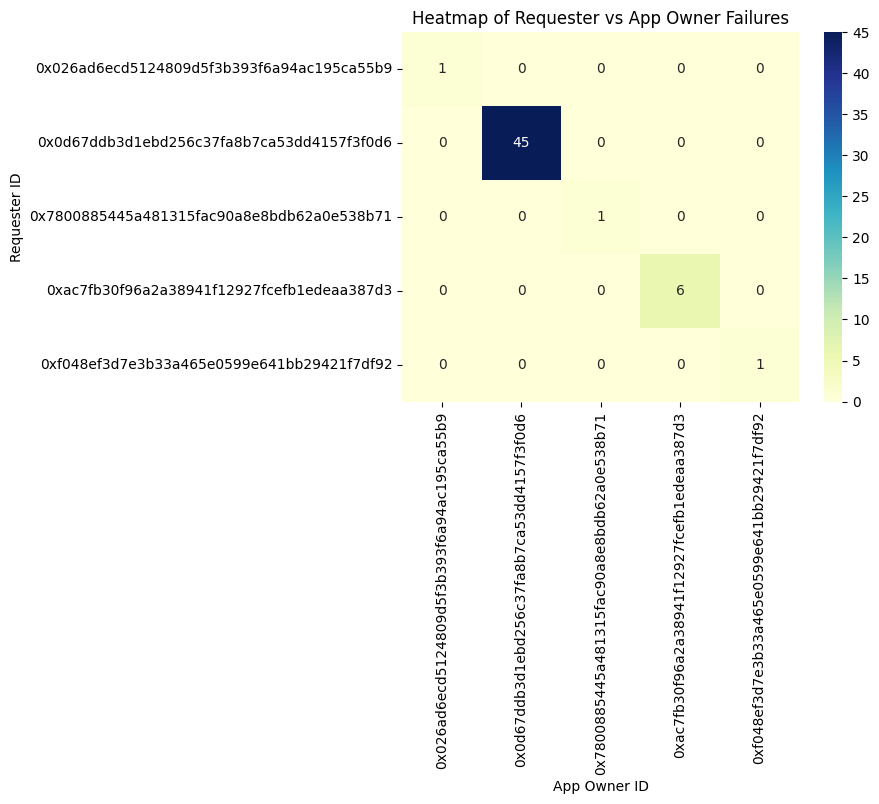

In [32]:
# Example: Plot a heatmap of requester vs appOwner failures
sns.heatmap(crosstab_result, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Requester vs App Owner Failures')
plt.xlabel('App Owner ID')
plt.ylabel('Requester ID')
plt.show()
